In [272]:
import pandas as pd

In [339]:
File = pd.read_csv(r"C:\Users\arshh\OneDrive\Desktop\AdvancedAI\heart-stroke-data\heart-data-discretized-train.csv")
data = pd.DataFrame(File)

In [309]:
File_2 = pd.read_csv(r"C:\Users\arshh\OneDrive\Desktop\AdvancedAI\heart-stroke-data\stroke-data-discretized-train.csv")
data_2 = pd.DataFrame(File) 

In [340]:
from pgmpy.models import BayesianNetwork

In [342]:
model = BayesianNetwork([("target", "chol"), 
("target", "thalach"),
("chol", "restecg"),
("thalach", "thal"), ("target", "thal"), 
("thal", "fbs"), 
("thalach", "slope"), ("target", "slope"), ("chol", "slope"), ("restecg", "slope"), 
("thalach", "oldpeak"), ("slope", "oldpeak"), 
("fbs", "age"), ("target", "age"), ("thal", "age"), ("slope", "age"), ("restecg", "age"),
("slope", "sex"),("chol", "sex"),("restecg", "sex"),
("target", "cp"),("slope", "cp"),("restecg", "cp"), 
("thalach", "ca"),("target", "ca"),("fbs", "ca"),("age", "ca"),("oldpeak", "ca"), 
("thalach", "exang"),("thal", "exang"),("target", "exang"),("fbs", "exang"),("age", "exang"),
("restecg", "exang"),("sex", "exang"),
("thalach", "trestbps"), ("target", "trestbps"), ("age", "trestbps"), ("chol", "trestbps"),
("thal", "trestbps"),("restecg", "trestbps"),("oldpeak", "trestbps"),("cp", "trestbps")])

In [314]:
# model_2 = BayesianNetwork([("heart_disease", "gender"), 
# ("heart_disease", "work_type"),("heart_disease", "Residence_type"),
# ("heart_disease", "hypertension"), ("heart_disease", "work_type"), 
# ("heart_disease", "stroke"), ("hypertension", "stroke"), 
# ("stroke", "age"), ("hypertension", "age"), ("heart_disease", "age"),("work_type", "age"), 
# ("age", "ever_married"),("age", "bmi"), ("hypertension", "bmi"), ("age", "avg_glucose_level"), 
# ("stroke", "avg_glucose_level"), ("gender", "avg_glucose_level"),
# ("hypertension", "avg_glucose_level"),("heart_disease", "avg_glucose_level"),
# ("stroke", "smoking_status"),("heart_disease", "smoking_status"),("Residence_type", "smoking_status"),
# ("avg_glucose_level", "smoking_status"),("ever_married", "smoking_status"),("work_type", "smoking_status"),
# ("hypertension", "smoking_status"),("gender", "smoking_status"),("age", "smoking_status")])

In [343]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,2,1,0,1,0,0,1,3,0,0,2,2,3,0
1,2,1,0,2,0,1,0,3,1,2,0,0,3,0
2,4,1,0,2,0,0,1,2,1,2,0,0,3,0
3,3,1,0,2,0,0,1,3,0,0,2,1,3,0
4,3,0,0,2,1,1,1,1,0,1,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,2,1,0,1,1,0,1,0,1,1,1,2,3,0
809,1,1,0,0,0,0,0,3,0,0,2,0,3,0
810,3,1,1,2,1,0,1,3,1,0,2,0,2,1
811,1,1,0,0,1,0,0,1,1,0,1,1,2,0


In [344]:
from pgmpy.estimators import ParameterEstimator
pe = ParameterEstimator(model, data)

In [345]:
#print("\n", pe.state_counts("cp"))

In [346]:
from pgmpy.estimators import MaximumLikelihoodEstimator, BicScore
mle = MaximumLikelihoodEstimator(model, data)
#print(mle.estimate_cpd("target"))

In [347]:
model.fit(data, estimator=MaximumLikelihoodEstimator)
#for cpd in model.get_cpds():
#   print(cpd)

In [348]:
# from pgmpy.estimat>ors import BayesianEstimator
# est = BayesianEstimator(model, data)

In [349]:
# print(est.estimate_cpd("target", prior_type = "BDeu", equivalent_sample_size=10))

In [350]:
bic = BicScore(data)
print(bic.score(model))

-830062.8516195143


In [351]:
from pgmpy.estimators import PC

from pgmpy.estimators.CITests import chi_square
from pgmpy.base import DAG
from pgmpy.independencies import Independencies

In [352]:
# print(chi_square(X='chol', Y='target', Z=[], data=data, significance_level=0.05))          
# print(chi_square(X='thalach', Y='target', Z=[], data=data, significance_level=0.05))      
# print(chi_square(X='chol', Y='restecg', Z=[], data=data, significance_level=0.05))       
# print(chi_square(X='thal', Y='thalach', Z=["target"], data=data, significance_level=0.05))          
# print(chi_square(X='fbs', Y='thal', Z=[], data=data, significance_level=0.05))
# print(chi_square(X='slope', Y='thalach', Z=["target", "thal", "chol", "restecg"], data=data, significance_level=0.05))
# print(chi_square(X='oldpeak', Y='thalach', Z=["slope"], data=data, significance_level=0.05))
# print(chi_square(X='age', Y='fbs', Z=["target", "thal", "slope", "restecg"], data=data, significance_level=0.05))
# print(chi_square(X='sex', Y='slope', Z=["chol", "restecg"], data=data, significance_level=0.05))
# print(chi_square(X='cp', Y='target', Z=["slope", "restecg"], data=data, significance_level=0.05))
# print(chi_square(X='ca', Y='thalach', Z=["target"], data=data, significance_level=0.05))
# print(chi_square(X='exang', Y='thalach', Z=["thal", "target", "fbs", "age", "restecg", "sex"], data=data, significance_level=0.05))
# print(chi_square(X='trestbps', Y='thalach', Z=["target" ,"age", "chol","thal", "restecg", "oldpeak", "cp"], data=data, significance_level=0.05))

In [379]:
#ind = Independencies("chol", "target")
est = PC(data)

In [354]:
skel, seperating_sets = est.build_skeleton(significance_level = 0.05)

  0%|          | 0/5 [00:00<?, ?it/s]

List of all the conditionally independent edges after applying the conditional independence test with significant level of 0.05

In [355]:
seperating_sets # Independent sets

{frozenset({'sex', 'trestbps'}): (),
 frozenset({'fbs', 'sex'}): (),
 frozenset({'sex', 'slope'}): (),
 frozenset({'chol', 'cp'}): (),
 frozenset({'chol', 'fbs'}): (),
 frozenset({'chol', 'exang'}): (),
 frozenset({'chol', 'oldpeak'}): (),
 frozenset({'chol', 'slope'}): (),
 frozenset({'chol', 'thal'}): (),
 frozenset({'chol', 'target'}): (),
 frozenset({'exang', 'fbs'}): (),
 frozenset({'fbs', 'oldpeak'}): (),
 frozenset({'fbs', 'target'}): (),
 frozenset({'restecg', 'thal'}): (),
 frozenset({'age', 'slope'}): ('target',),
 frozenset({'cp', 'sex'}): ('thal',),
 frozenset({'exang', 'sex'}): ('thal',),
 frozenset({'oldpeak', 'sex'}): ('target',),
 frozenset({'cp', 'fbs'}): ('thalach',),
 frozenset({'cp', 'restecg'}): ('exang',),
 frozenset({'fbs', 'restecg'}): ('age',),
 frozenset({'fbs', 'thalach'}): ('cp',),
 frozenset({'restecg', 'thalach'}): ('target',),
 frozenset({'exang', 'restecg'}): ('thalach',),
 frozenset({'restecg', 'slope'}): ('target',),
 frozenset({'ca', 'thal'}): ('targe

In [356]:
print("Conditionally dependent edges:  \n\n", skel.edges()) #Dependent sets

Conditionally dependent edges:  

 [('age', 'sex'), ('age', 'cp'), ('age', 'trestbps'), ('age', 'chol'), ('age', 'restecg'), ('age', 'thalach'), ('age', 'exang'), ('age', 'oldpeak'), ('age', 'ca'), ('age', 'thal'), ('age', 'target'), ('sex', 'chol'), ('sex', 'restecg'), ('sex', 'thalach'), ('sex', 'ca'), ('sex', 'thal'), ('cp', 'trestbps'), ('cp', 'thalach'), ('cp', 'exang'), ('cp', 'oldpeak'), ('cp', 'slope'), ('cp', 'ca'), ('cp', 'thal'), ('cp', 'target'), ('trestbps', 'chol'), ('trestbps', 'fbs'), ('trestbps', 'restecg'), ('trestbps', 'thalach'), ('trestbps', 'exang'), ('trestbps', 'oldpeak'), ('trestbps', 'slope'), ('trestbps', 'ca'), ('trestbps', 'thal'), ('trestbps', 'target'), ('chol', 'restecg'), ('chol', 'thalach'), ('chol', 'ca'), ('fbs', 'ca'), ('fbs', 'thal'), ('restecg', 'oldpeak'), ('restecg', 'ca'), ('thalach', 'exang'), ('thalach', 'oldpeak'), ('thalach', 'slope'), ('thalach', 'ca'), ('thalach', 'thal'), ('thalach', 'target'), ('exang', 'oldpeak'), ('exang', 'ca'), ('ol

Text(0.5, 1.0, 'Undirected Skeleton ')

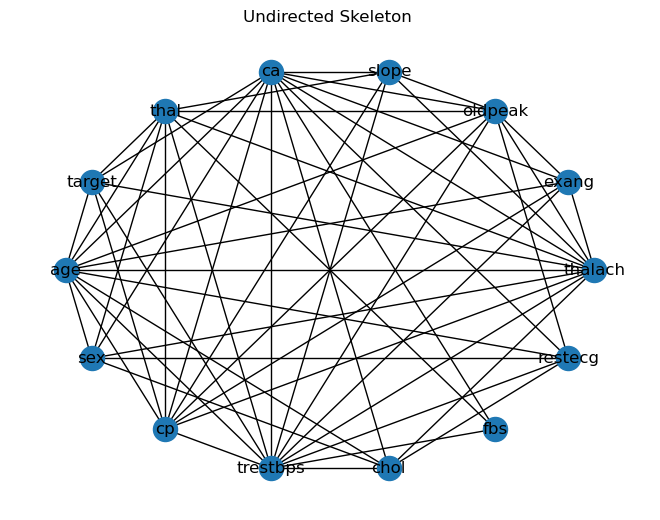

In [386]:
import matplotlib.pyplot as plt
nx.draw_shell(skel, with_labels = True)
plt.title("Undirected Skeleton ")

In [387]:
pdag = est.skeleton_to_pdag(skel, seperating_sets)
print("PDAG_edges: ", pdag.edges())

PDAG_edges:  [('target', 'age'), ('target', 'thal'), ('target', 'cp'), ('target', 'ca'), ('target', 'trestbps'), ('target', 'thalach'), ('restecg', 'age'), ('restecg', 'ca'), ('chol', 'age'), ('chol', 'ca'), ('exang', 'oldpeak'), ('exang', 'thalach'), ('exang', 'ca'), ('exang', 'trestbps'), ('exang', 'age'), ('oldpeak', 'trestbps'), ('slope', 'oldpeak'), ('slope', 'cp'), ('slope', 'trestbps'), ('slope', 'thalach'), ('cp', 'trestbps'), ('cp', 'thalach'), ('cp', 'exang'), ('sex', 'age'), ('fbs', 'trestbps')]


In [388]:
import networkx as nx

Text(0.5, 1.0, 'Skeleton to PDAG')

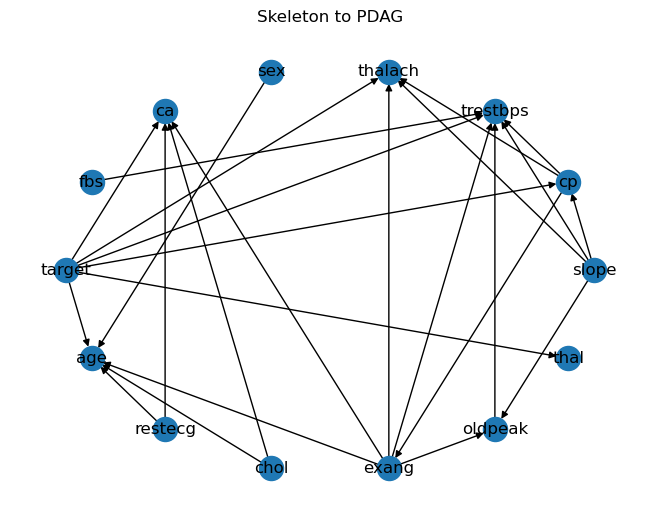

In [389]:
nx.draw_shell(pdag, with_labels = True)
plt.title("Skeleton to PDAG")

Step 2 for PC Algorithm

In [390]:
model = pdag.to_dag()
print("DAG edges: ", model.edges())

DAG edges:  [('target', 'age'), ('target', 'thal'), ('target', 'cp'), ('target', 'ca'), ('target', 'trestbps'), ('target', 'thalach'), ('restecg', 'age'), ('restecg', 'ca'), ('chol', 'age'), ('chol', 'ca'), ('exang', 'oldpeak'), ('exang', 'thalach'), ('exang', 'ca'), ('exang', 'trestbps'), ('exang', 'age'), ('oldpeak', 'trestbps'), ('slope', 'oldpeak'), ('slope', 'cp'), ('slope', 'trestbps'), ('slope', 'thalach'), ('cp', 'trestbps'), ('cp', 'thalach'), ('cp', 'exang'), ('sex', 'age'), ('fbs', 'trestbps')]


Text(0.5, 1.0, 'PDAG to DAG')

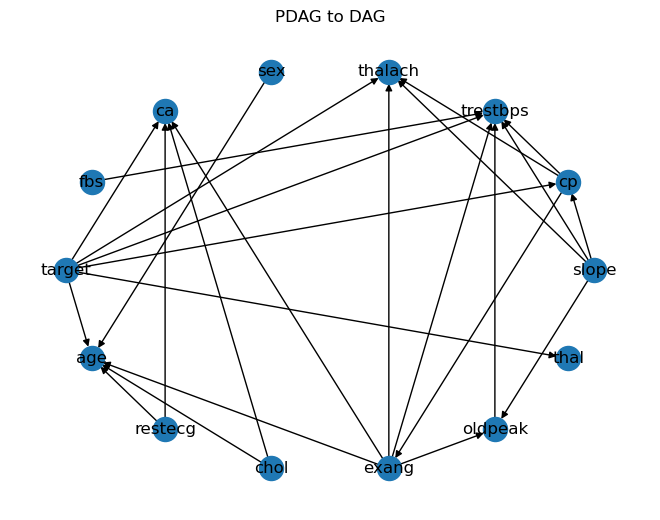

In [391]:
nx.draw_shell(model, with_labels=True)
plt.title("PDAG to DAG")

In [392]:
new = BayesianNetwork(model)

In [393]:
from pgmpy.estimators import ParameterEstimator
pe = ParameterEstimator(new, data)

In [394]:
from pgmpy.estimators import MaximumLikelihoodEstimator, BicScore
mle = MaximumLikelihoodEstimator(new, data)
print(mle.estimate_cpd("target"))

+-----------+----------+
| target(0) | 0.466981 |
+-----------+----------+
| target(1) | 0.533019 |
+-----------+----------+


In [395]:
test_file = pd.read_csv(r"C:\Users\arshh\OneDrive\Desktop\AdvancedAI\heart-stroke-data\heart-data-discretized-test.csv")
data = pd.DataFrame(test_file)

In [396]:
x_test = data.drop(["target"], axis = 1)
y_test = data.target

In [397]:
data_test = pd.concat([x_test, y_test], axis = 1)
y_pred = model.predict(x_test)

AttributeError: 'DAG' object has no attribute 'predict'

In [398]:
from pgmpy.estimators import MmhcEstimator
from pgmpy.estimators import BicScore

In [399]:
# use hill climb search to orient the edges:
hc = HillClimbSearch(data)
modell = hc.estimate(tabu_length=5, white_list=skel.to_directed().edges(), scoring_method=BicScore(data))
print("Part 2) Model:    ", model.edges())

  0%|          | 0/1000000 [00:00<?, ?it/s]

Part 2) Model:     [('target', 'age'), ('target', 'thal'), ('target', 'cp'), ('target', 'ca'), ('target', 'trestbps'), ('target', 'thalach'), ('restecg', 'age'), ('restecg', 'ca'), ('chol', 'age'), ('chol', 'ca'), ('exang', 'oldpeak'), ('exang', 'thalach'), ('exang', 'ca'), ('exang', 'trestbps'), ('exang', 'age'), ('oldpeak', 'trestbps'), ('slope', 'oldpeak'), ('slope', 'cp'), ('slope', 'trestbps'), ('slope', 'thalach'), ('cp', 'trestbps'), ('cp', 'thalach'), ('cp', 'exang'), ('sex', 'age'), ('fbs', 'trestbps')]


In [400]:
bic_new = BicScore(data)
print(bic_new.score(new))

-9982.626556513616


Text(0.5, 1.0, 'DAG from PC after HC algorithm')

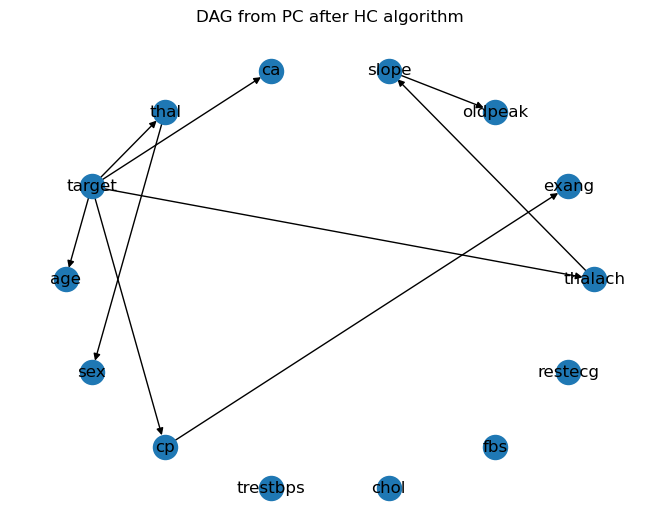

In [402]:
nx.draw_shell(modell, with_labels=True)
plt.title("DAG from PC after HC algorithm")